In [1]:
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

Using TensorFlow backend.


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import time

# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid(True)
    fig.canvas.draw()

In [0]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
# if you observe the input shape its 3 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [6]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [7]:
# An example data point
print(X_train[17])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  11 203 229
  32   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0  26  47  47  30  95 254 215  13   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  45 154 185 185 223 253 253 133 175
 255 188  19   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0 110 253 253 253 246 161 228 253 253 254  92   

In [0]:
# we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255
# We set the data in matrix to be between 0 and 1

X_train = X_train/255
X_test = X_test/255

In [9]:
# example data point after normlizing
print(X_train[17])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [10]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
# https://keras.io/getting-started/sequential-model-guide/

# The Sequential model is a linear stack of layers.
# you can create a Sequential model by passing a list of layer instances to the constructor:

# model = Sequential([
#     Dense(32, input_shape=(784,)),
#     Activation('relu'),
#     Dense(10),
#     Activation('softmax'),
# ])

# You can also simply add layers via the .add() method:

# model = Sequential()
# model.add(Dense(32, input_dim=784))
# model.add(Activation('relu'))

###

# https://keras.io/layers/core/

# keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
# bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
# kernel_constraint=None, bias_constraint=None)

# Dense implements the operation: output = activation(dot(input, kernel) + bias) where
# activation is the element-wise activation function passed as the activation argument, 
# kernel is a weights matrix created by the layer, and 
# bias is a bias vector created by the layer (only applicable if use_bias is True).

# output = activation(dot(input, kernel) + bias)  => y = activation(WT. X + b)

####

# https://keras.io/activations/

# Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers:

# from keras.layers import Activation, Dense

# model.add(Dense(64))
# model.add(Activation('tanh'))

# This is equivalent to:
# model.add(Dense(64, activation='tanh'))

# there are many activation functions ar available ex: tanh, relu, softmax


from keras.models import Sequential 
from keras.layers import Dense, Activation 


In [0]:
# some model parameters
output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 50


Simple Neuron without hidden layer

In [0]:
# start building a model
model = Sequential()

# The model needs to know what input shape it should expect. 
# For this reason, the first layer in a Sequential model 
# (and only the first, because following layers can do automatic shape inference)
# needs to receive information about its input shape. 
# you can use input_shape and input_dim to pass the shape of input

# output_dim represent the number of nodes need in that layer
# here we have 10 nodes

model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

In [14]:
# Before training a model, you need to configure the learning process, which is done via the compile method

# It receives three arguments:
# An optimizer. This could be the string identifier of an existing optimizer , https://keras.io/optimizers/
# A loss function. This is the objective that the model will try to minimize., https://keras.io/losses/
# A list of metrics. For any classification problem you will want to set this to metrics=['accuracy'].  https://keras.io/metrics/


# Note: when using the categorical_crossentropy loss, your targets should be in categorical format 
# (e.g. if you have 10 classes, the target for each sample should be a 10-dimensional vector that is all-zeros except 
# for a 1 at the index corresponding to the class of the sample).

# that is why we converted out labels into vectors

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Keras models are trained on Numpy arrays of input data and labels. 
# For training a model, you will typically use the  fit function

# fit(self, x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, 
# validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, 
# validation_steps=None)

# fit() function Trains the model for a fixed number of epochs (iterations on a dataset).

# it returns A History object. Its History.history attribute is a record of training loss values and 
# metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).

# https://github.com/openai/baselines/issues/20

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test)) 


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.6725 - acc: 0.8355 - val_loss: 0.3828 - val_acc: 0.9029
Epoch 2/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.3620 - acc: 0.9034 - val_loss: 0.3196 - val_acc: 0.9126
Epoch 3/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.3192 - acc: 0.9121 - val_loss: 0.2967 - val_acc: 0.9168
Epoch 4/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.2991 - acc: 0.9170 - val_loss: 0.2854 - val_acc: 0.9210
Epoch 5/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.2876 - acc: 0.9200 - val_loss: 0.2757 - val_acc: 0.9225
Epoch 6/50
60000/60000 [==============================] - 1s 20us/step - loss: 0.2794 - acc: 0.9223 - val_loss: 0.2731 - val_acc: 0.9252
Epoch 7/50
60000/60000 [==============================] - 1s 22us/step - loss: 0.2731 - acc: 0.9240 - val_loss: 0.2701 - val_acc

Test score: 0.26811035336405037
Test accuracy: 0.9291


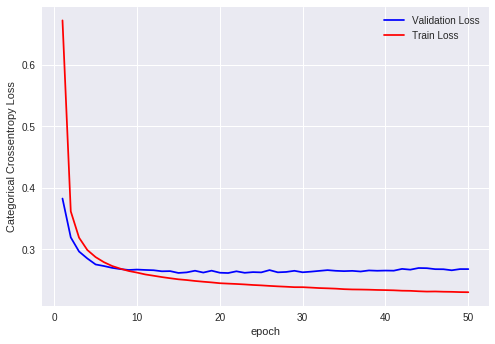

In [15]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

 **1) a ] MLP + ReLu activation + Adam Optimizer 786 - 128 - 64 - 10** (2 hidden Layers without dropouts and batch normalization)

In [16]:
# Multilayer perceptron

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model.add(Dense(output_dim, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 56us/step - loss: 0.3605 - acc: 0.9000 - val_loss: 0.1813 - val_acc: 0.9419
Epoch 2/50
60000/60000 [==============================] - 3s 55us/step - loss: 0.1391 - acc: 0.9594 - val_loss: 0.1301 - val_acc: 0.9614
Epoch 3/50
60000/60000 [==============================] - 3s 53us/step - loss: 0.0979 - acc: 0.9706 - val_loss: 0.0916 - val_acc: 0.9713
Epoch 4/50
60000/60000 [==============================] - 3s 52us/step - loss: 0.0727 - acc: 0.9775 - val_loss: 0.0867 - val_acc: 0.9731
Epoch 5/50
60000/60000 [==============================] - 3s 51us/step - loss: 0.0566 - acc: 0.9829 - val_loss: 0.0794 - val_acc: 0.9752
Epoch 6/50
60000/60000 [==============================] - 3s 52us/step - loss: 0.0465 - acc: 0.9859 - val_loss: 0.0723 - val_acc: 0.9781
Epoch 7/50
60000/60000 [==============================] - 3s 52us/step - loss: 0.0377 - acc: 0.9887 - val_loss: 0.0840 - val_acc

Test score: 0.12011331661622071
Test accuracy: 0.9822


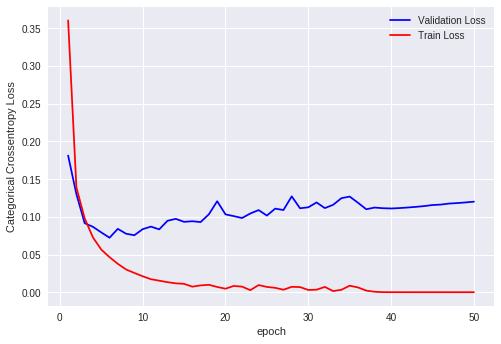

In [18]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


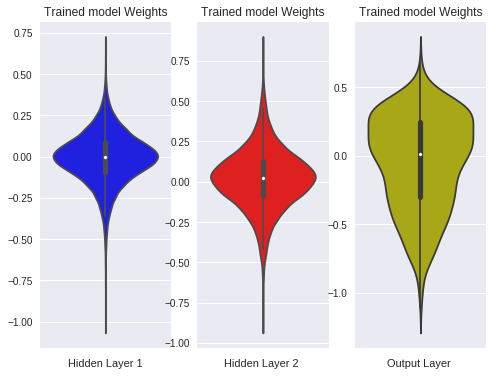

In [19]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(8, 6))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()


 **1) b ] MLP + ReLu activation + Adam Optimizer 786 - 128 - 64 - 10** (2 hidden Layers using dropouts and batch normalization)

In [20]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model.add(BatchNormalization())                 
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(output_dim, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               100480    
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                650       
Total para

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 94us/step - loss: 0.4485 - acc: 0.8651 - val_loss: 0.1615 - val_acc: 0.9496
Epoch 2/50
60000/60000 [==============================] - 5s 76us/step - loss: 0.2185 - acc: 0.9348 - val_loss: 0.1284 - val_acc: 0.9616
Epoch 3/50
60000/60000 [==============================] - 4s 74us/step - loss: 0.1681 - acc: 0.9496 - val_loss: 0.1033 - val_acc: 0.9681
Epoch 4/50
60000/60000 [==============================] - 4s 68us/step - loss: 0.1453 - acc: 0.9565 - val_loss: 0.1034 - val_acc: 0.9685
Epoch 5/50
60000/60000 [==============================] - 4s 65us/step - loss: 0.1271 - acc: 0.9616 - val_loss: 0.0847 - val_acc: 0.9741
Epoch 6/50
60000/60000 [==============================] - 4s 66us/step - loss: 0.1158 - acc: 0.9653 - val_loss: 0.0842 - val_acc: 0.9741
Epoch 7/50
60000/60000 [==============================] - 4s 65us/step - loss: 0.1059 - acc: 0.9679 - val_loss: 0.0779 - val_acc

Test score: 0.07308656300352669
Test accuracy: 0.9807


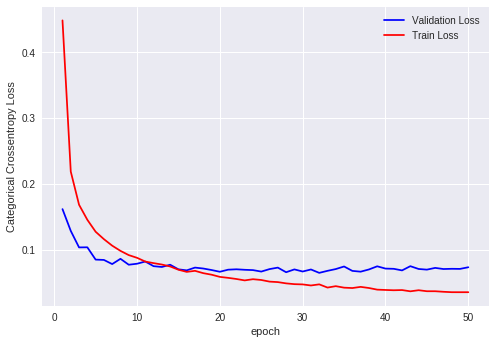

In [22]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


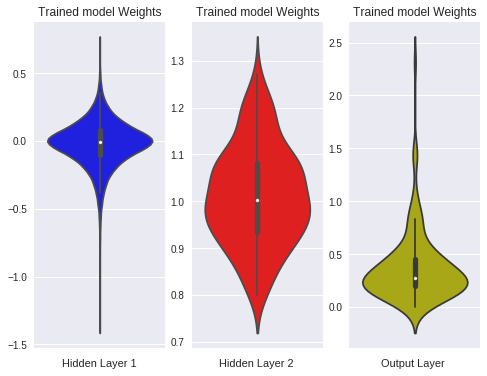

In [23]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(8, 6))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

 **2) a ] MLP + ReLu activation + Adam Optimizer 786 - 252 - 128 - 64 - 10** (3 hidden Layers without dropouts and batch *normalization*)

In [24]:
# Multilayer perceptron

model = Sequential()
model.add(Dense(252, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model.add(Dense(output_dim, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 252)               197820    
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32384     
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                650       
Total params: 239,110
Trainable params: 239,110
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 82us/step - loss: 0.3003 - acc: 0.9125 - val_loss: 0.1383 - val_acc: 0.9588
Epoch 2/50
60000/60000 [==============================] - 4s 73us/step - loss: 0.1082 - acc: 0.9675 - val_loss: 0.0930 - val_acc: 0.9715
Epoch 3/50
60000/60000 [==============================] - 4s 74us/step - loss: 0.0748 - acc: 0.9773 - val_loss: 0.0938 - val_acc: 0.9698
Epoch 4/50
60000/60000 [==============================] - 4s 73us/step - loss: 0.0517 - acc: 0.9842 - val_loss: 0.0847 - val_acc: 0.9723
Epoch 5/50
60000/60000 [==============================] - 4s 71us/step - loss: 0.0385 - acc: 0.9878 - val_loss: 0.0701 - val_acc: 0.9784
Epoch 6/50
60000/60000 [==============================] - 4s 72us/step - loss: 0.0319 - acc: 0.9895 - val_loss: 0.0662 - val_acc: 0.9819
Epoch 7/50
60000/60000 [==============================] - 4s 73us/step - loss: 0.0240 - acc: 0.9923 - val_loss: 0.0779 - val_acc

Test score: 0.09862336199718143
Test accuracy: 0.9839


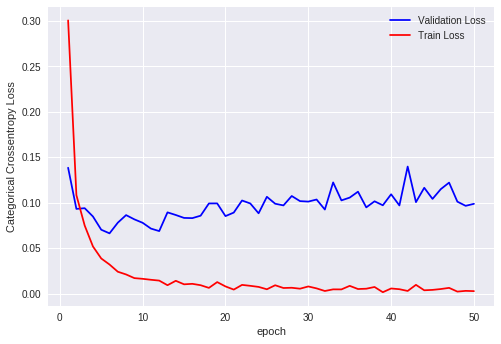

In [26]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


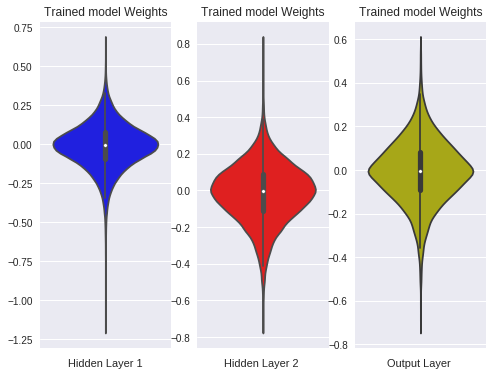

In [27]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(8, 6))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

 **2) b ] MLP + ReLu activation + Adam Optimizer 786 - 252 - 128 - 64 - 10** (3 hidden Layers with dropouts and batch *normalization*)

In [28]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

model = Sequential()
model.add(Dense(252, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model.add(BatchNormalization())                 
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(output_dim, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 252)               197820    
_________________________________________________________________
batch_normalization_3 (Batch (None, 252)               1008      
_________________________________________________________________
dropout_3 (Dropout)          (None, 252)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               32384     
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                8256      
__________

In [29]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 7s 124us/step - loss: 0.7857 - acc: 0.7605 - val_loss: 0.2100 - val_acc: 0.9366
Epoch 2/50
60000/60000 [==============================] - 6s 103us/step - loss: 0.3325 - acc: 0.9054 - val_loss: 0.1563 - val_acc: 0.9546
Epoch 3/50
60000/60000 [==============================] - 6s 102us/step - loss: 0.2548 - acc: 0.9288 - val_loss: 0.1297 - val_acc: 0.9629
Epoch 4/50
60000/60000 [==============================] - 6s 100us/step - loss: 0.2186 - acc: 0.9387 - val_loss: 0.1156 - val_acc: 0.9656
Epoch 5/50
60000/60000 [==============================] - 6s 103us/step - loss: 0.1950 - acc: 0.9463 - val_loss: 0.1062 - val_acc: 0.9693
Epoch 6/50
60000/60000 [==============================] - 6s 102us/step - loss: 0.1793 - acc: 0.9502 - val_loss: 0.1040 - val_acc: 0.9705
Epoch 7/50
60000/60000 [==============================] - 6s 104us/step - loss: 0.1661 - acc: 0.9526 - val_loss: 0.0920 - 

Test score: 0.06890872985523311
Test accuracy: 0.9833


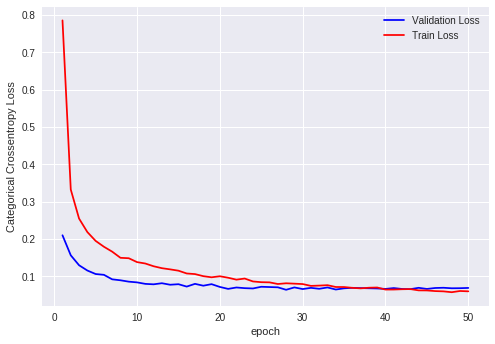

In [30]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


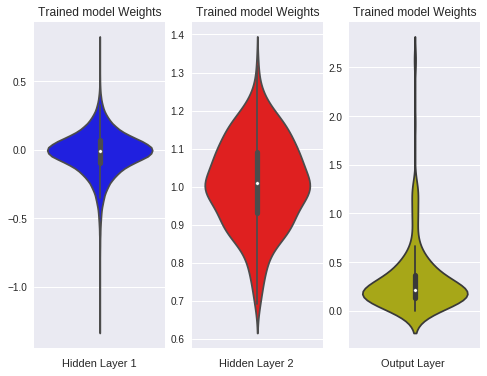

In [31]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(8, 6))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

 **3) a] MLP + ReLu activation + Adam Optimizer 786 - 1024 - 512 - 252 - 128 - 64 - 10** (5 hidden Layers without dropouts and batch *normalization*)

In [32]:
# Multilayer perceptron

model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model.add(Dense(512, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model.add(Dense(output_dim, activation='softmax'))

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_17 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_18 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_19 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_20 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_21 (Dense)             (None, 10)                650       
Total params: 1,501,770
Trainable params: 1,501,770
Non-trainable params: 0
_________________________________________________________________


In [33]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 20s 337us/step - loss: 0.2180 - acc: 0.9326 - val_loss: 0.1187 - val_acc: 0.9630
Epoch 2/50
60000/60000 [==============================] - 19s 324us/step - loss: 0.0860 - acc: 0.9736 - val_loss: 0.0877 - val_acc: 0.9721
Epoch 3/50
60000/60000 [==============================] - 20s 325us/step - loss: 0.0587 - acc: 0.9820 - val_loss: 0.0715 - val_acc: 0.9805
Epoch 4/50
60000/60000 [==============================] - 19s 325us/step - loss: 0.0436 - acc: 0.9860 - val_loss: 0.0727 - val_acc: 0.9795
Epoch 5/50
60000/60000 [==============================] - 19s 324us/step - loss: 0.0335 - acc: 0.9899 - val_loss: 0.1005 - val_acc: 0.9711
Epoch 6/50
60000/60000 [==============================] - 20s 325us/step - loss: 0.0298 - acc: 0.9909 - val_loss: 0.0683 - val_acc: 0.9836
Epoch 7/50
60000/60000 [==============================] - 20s 325us/step - loss: 0.0252 - acc: 0.9924 - val_loss: 0.

Test score: 0.10768853482530585
Test accuracy: 0.9847


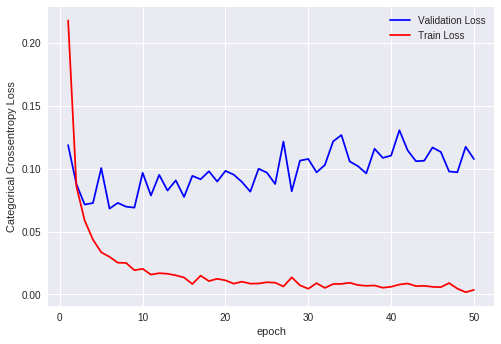

In [34]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


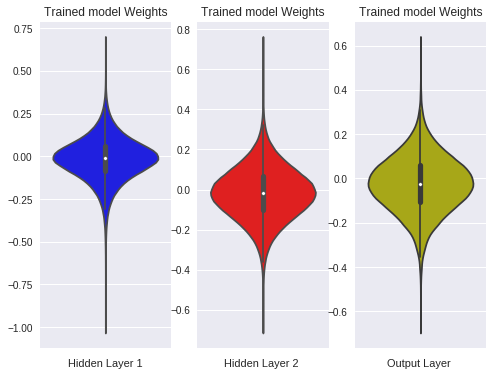

In [35]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure(figsize=(8, 6))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

 **3) b] MLP + ReLu activation + Adam Optimizer 786 - 1024 - 512 - 252 - 128 - 64 - 10** (5 hidden Layers using dropouts and batch *normalization*)

In [36]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model.add(BatchNormalization())                 
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(output_dim, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 1024)              803840    
_________________________________________________________________
batch_normalization_6 (Batch (None, 1024)              4096      
_________________________________________________________________
dropout_6 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_23 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_7 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 256)               131328    
__________

In [37]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 29s 487us/step - loss: 0.9192 - acc: 0.7207 - val_loss: 0.2057 - val_acc: 0.9428
Epoch 2/50
60000/60000 [==============================] - 27s 447us/step - loss: 0.3167 - acc: 0.9145 - val_loss: 0.1433 - val_acc: 0.9601
Epoch 3/50
60000/60000 [==============================] - 27s 447us/step - loss: 0.2345 - acc: 0.9381 - val_loss: 0.1183 - val_acc: 0.9692
Epoch 4/50
60000/60000 [==============================] - 27s 456us/step - loss: 0.2004 - acc: 0.9469 - val_loss: 0.1112 - val_acc: 0.9697
Epoch 5/50
60000/60000 [==============================] - 28s 464us/step - loss: 0.1684 - acc: 0.9564 - val_loss: 0.0959 - val_acc: 0.9743
Epoch 6/50
60000/60000 [==============================] - 27s 457us/step - loss: 0.1527 - acc: 0.9592 - val_loss: 0.0922 - val_acc: 0.9754
Epoch 7/50
60000/60000 [==============================] - 27s 455us/step - loss: 0.1447 - acc: 0.9618 - val_loss: 0.

Test score: 0.058299148730380695
Test accuracy: 0.9868


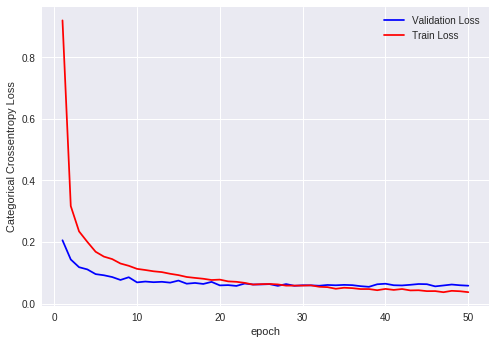

In [38]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


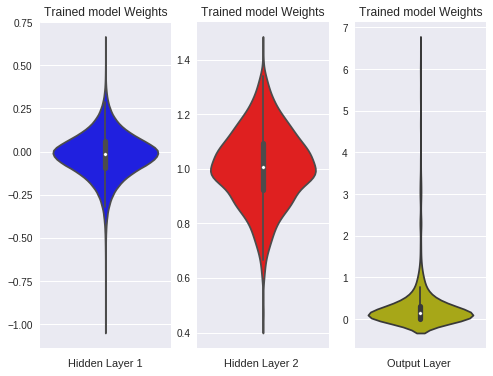

In [39]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(8, 6))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

In [7]:
from prettytable import PrettyTable    
x = PrettyTable()
 
x.field_names = ["Hidden layers", "Train Accuracy", "Test Accuracy"]
x.add_row(["without using hidden layers", 0.9365, 0.9291])
x.add_row(["using 2 hidden layers without dropout & batch normalization", 1.000, 0.9822])
x.add_row(["using 2 hidden layers with dropout & batch normalization", 0.9885, 0.9807])
x.add_row(["using 3 hidden layers without dropout & batch normalization", 0.9992, 0.9839])
x.add_row(["using 3 hidden layers with dropout & batch normalization", 0.9826, 0.9833])
x.add_row(["using 5 hidden layers without dropout & batch normalization", 0.9991, 0.9847])
x.add_row(["using 5 hidden layers with dropout & batch normalization", 0.9901, 0.9868])
print(x)

+-------------------------------------------------------------+----------------+---------------+
|                        Hidden layers                        | Train Accuracy | Test Accuracy |
+-------------------------------------------------------------+----------------+---------------+
|                 without using hidden layers                 |     0.9365     |     0.9291    |
| using 2 hidden layers without dropout & batch normalization |      1.0       |     0.9822    |
|   using 2 hidden layers with dropout & batch normalization  |     0.9885     |     0.9807    |
| using 3 hidden layers without dropout & batch normalization |     0.9992     |     0.9839    |
|   using 3 hidden layers with dropout & batch normalization  |     0.9826     |     0.9833    |
| using 5 hidden layers without dropout & batch normalization |     0.9991     |     0.9847    |
|   using 5 hidden layers with dropout & batch normalization  |     0.9901     |     0.9868    |
+-----------------------------

# Conclusion

1) The model is a little overfit when we dont use dropout or batch normaliztion.

2) The model performs a little better when using 5 hidden layers. The train accuarcy is 99.01% and test accuracy is 98.68%